# Analysis on Impact of Crime on Rental and Housing Prices in Chicago

### Motivation
Safety has been considered a fundamental human right since the beginning of the beginning of the human rights era. Maintaining Law and Order is one the most basic and important responsibilities of any local government. Crime rate thus becomes a very important indicator for comparing neighborhoods. One of the most studied effects of crime is the impact it has on the housing and rental rates in any communities. One of the easiest ways to measure crime is to explore the housing and rental rates in a given area. The goal of this project is to study the relationship betweeen crime rate and housing prices in Chicago city (known for Law and Order!) and the to discover patterns in the types of crimes that effect housing prices more than others.

### Dataset
For this project I plan to use two different datasets to prepare data for my analysis. I plan to use the [Zillow Dataset](https://www.zillow.com/research/data/) to get the housing prices for neighborhoods in Chicago. For crime I plan to use the Chicago Crimes dataset that is freely available for use on [Kaggle](https://www.kaggle.com/chicago/chicago-crime) under the [CC0 Licence](https://creativecommons.org/publicdomain/zero/1.0/). I will also use [Craig M. Booth's github code](https://github.com/craigmbooth/chicago_neighborhood_finder/tree/739deff8f9f349720299b193b4259aa690876e52) to map the latitude-longitude data to the neighborhoods in the housing dataset. 

### Unknowns
The creation of the dataset is inspired from a similar analysis performed by Harold Li that can be found on [github](https://github.com/haroldmli/01-Chicago-Crime-Rates-and-Housing-Prices). Since the original sources of data used for this analysis are no longer available, I will be substituting data from [Zillow](https://www.zillow.com/research/data/) and [Kaggle](https://www.kaggle.com/chicago/chicago-crime). While combining the two data sources, there may be mismatches between the neighborhoods in the two datasets which may lead to problems in creating the data.



In [80]:
import pandas as pd
import json

crime_data = pd.read_csv('Chicago_Crimes_Dataset_2019.csv', sep=',', header=0)

In [66]:
len(crime_data[crime_data.Latitude.notnull()])

259156

In [65]:
len(crime_data)

260407

In [70]:
crime_data = crime_data[crime_data.Latitude.notnull()]
crime_data.Date = pd.to_datetime(crime_data.Date)

In [71]:
crime_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11706858,JC287006,2019-05-31 22:32:00,024XX E 72ND ST,041A,BATTERY,AGGRAVATED - HANDGUN,RESTAURANT,False,False,...,7.0,43,04B,1193734.0,1857691.0,2019,11/10/2020 03:52:15 PM,41.764449,-87.565469,"(41.764448809, -87.565468967)"
1,11704699,JC284068,2019-05-29 21:55:00,022XX W CERMAK RD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,True,False,...,25.0,31,05,1161792.0,1889364.0,2019,11/10/2020 03:52:15 PM,41.852086,-87.681664,"(41.852086224, -87.681664275)"
2,11608043,JC167110,2019-02-26 21:15:00,001XX E 123RD ST,051A,ASSAULT,AGGRAVATED - HANDGUN,RESIDENCE,True,True,...,9.0,53,04A,1179294.0,1823431.0,2019,11/10/2020 03:52:15 PM,41.670776,-87.619436,"(41.670776461, -87.61943596)"
3,12148532,JD347169,2019-06-01 00:01:00,055XX W 64TH ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,...,13.0,64,02,1140680.0,1861587.0,2019,11/09/2020 03:49:27 PM,41.776275,-87.759832,"(41.77627523, -87.759832397)"
4,11936873,JC565675,2019-12-30 17:57:00,004XX W BARRY AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,44.0,6,04B,1172737.0,1920656.0,2019,11/09/2020 03:49:27 PM,41.937718,-87.640566,"(41.937718335, -87.64056599)"


In [75]:
crime_data.groupby(['Primary Type'])['ID'].count()

Primary Type
ARSON                                  374
ASSAULT                              20602
BATTERY                              49478
BURGLARY                              9633
CONCEALED CARRY LICENSE VIOLATION      217
CRIM SEXUAL ASSAULT                    958
CRIMINAL DAMAGE                      26613
CRIMINAL SEXUAL ASSAULT                631
CRIMINAL TRESPASS                     6805
DECEPTIVE PRACTICE                   18237
GAMBLING                               142
HOMICIDE                               503
HUMAN TRAFFICKING                       13
INTERFERENCE WITH PUBLIC OFFICER      1545
INTIMIDATION                           164
KIDNAPPING                             172
LIQUOR LAW VIOLATION                   232
MOTOR VEHICLE THEFT                   8977
NARCOTICS                            14996
NON-CRIMINAL                             4
OBSCENITY                               59
OFFENSE INVOLVING CHILDREN            2314
OTHER NARCOTIC VIOLATION                 

In [76]:
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [72]:
min(crime_data.Date)

Timestamp('2019-01-01 00:00:00')

In [73]:
max(crime_data.Date)

Timestamp('2019-12-31 23:55:00')

In [84]:
import geojson
with open('chicago_boundaries.geojson') as f:
    gj = geojson.load(f)
features = gj['features']

In [85]:
len(features)

98

In [99]:
for feature in features:
    print(feature.properties['pri_neigh'])

Grand Boulevard
Printers Row
United Center
Sheffield & DePaul
Humboldt Park
Garfield Park
North Lawndale
Little Village
Armour Square
Avalon Park
Burnside
Hermosa
Avondale
Logan Square
Calumet Heights
East Side
West Pullman
Garfield Ridge
New City
Englewood
Grand Crossing
Ashburn
Mount Greenwood
Morgan Park
O'Hare
Jackson Park
Loop
Pullman
Riverdale
Hegewisch
Greektown
Douglas
Museum Campus
Edgewater
Lake View
Lincoln Park
Magnificent Mile
Lincoln Square
Oakland
Grant Park
West Loop
Fuller Park
Andersonville
Woodlawn
Portage Park
Rush & Division
Little Italy, UIC
Kenwood
Rogers Park
Jefferson Park
Sauganash,Forest Glen
North Park
Albany Park
Irving Park
Dunning
West Ridge
Uptown
Norwood Park
Streeterville
South Shore
Chatham
South Chicago
Roseland
North Center
South Deering
Washington Park
Millenium Park
Near South Side
Chinatown
Chicago Lawn
Auburn Gresham
Beverly
Washington Heights
Edison Park
Hyde Park
Bucktown
Lower West Side
Wrigleyville
Archer Heights
Brighton Park
Mckinley Park


In [136]:
chicago_neighborhoods = pd.read_csv('IL-Regions.csv', sep='\t', header = None)

In [137]:
chicago_neighborhoods

,0,1,2,3,4,5,6
0,IL,Cook,Chicago,Chatham,273222,218,"-87.597208915594;41.751072022231,-87.597240915..."
1,IL,Cook,Chicago,North Center,269600,163,"-87.673960915665;41.961532022427,-87.673918915..."
2,IL,Cook,Chicago,O'hare,269603,303,"-87.836540915817;41.974888022439,-87.836540915..."
3,IL,Cook,Chicago,Washington Park,275927,103,"-87.615601915611;41.783765022261,-87.615566915..."
4,IL,Cook,Chicago,Garfield Ridge,269584,271,"-87.738570915725;41.822185022297,-87.738576915..."
...,...,...,...,...,...,...,...
72,IL,Cook,Chicago,Hyde Park,269586,217,"-87.58282091558;41.802607022279,-87.5818229155..."
73,IL,Cook,Chicago,South Lawndale,269606,200,"-87.688061915678;41.855850022328,-87.688108915..."
74,IL,Cook,Chicago,Gage Park,269582,152,"-87.67942191567;41.804705022281,-87.6794339156..."
75,IL,Cook,Chicago,McKinley Park,139408,203,"-87.663055915655;41.837643022311,-87.663058915..."


In [138]:
chicago_neighborhoods.columns = ['state', 'county','city', 'neighbourhood','regionid', 'total_potins', 'coordinates']

In [139]:
chicago_neighborhoods['neighbourhood'].unique()

array(['Chatham', 'North Center', "O'hare", 'Washington Park',
       'Garfield Ridge', 'Beverly', 'Ashburn', 'Forest Glen',
       'Edison Park', 'Riverdale', 'Woodlawn', 'Lincoln Park',
       'Englewood', 'Jefferson Park', 'Hermosa', 'Loop', 'Morgan Park',
       'Near South Side', 'South Chicago', 'North Lawndale',
       'Mount Greenwood', 'Fuller Park', 'Uptown', 'North Park',
       'Dunning', 'East Side', 'Pottage Park', 'Edgewater',
       'West Garfield Park', 'Roseland', 'Irving Park', 'West Englewood',
       'Auburn Gresham', 'Chicago Lawn', 'West Town', 'Bridgeport',
       'Hegewisch', 'Lower West Side', 'Brighton Park', 'Avalon Park',
       'Burnside', 'South Shore', 'Belmont Cragin', 'New City', 'Oakland',
       'Washington Heights', 'Albany Park', 'West Ridge', 'Douglas',
       'West Pullman', 'Rogers Park', 'Pullman', 'Austin', 'Logan Square',
       'Archer Heights', 'Near North Side', 'Lake View', 'West Lawn',
       'West Elsdon', 'Avondale', 'Armour Square', '

In [210]:
chicago_neighborhoods['coordinates2'] = chicago_neighborhoods['coordinates'].apply(lambda x: [[float(coord.split(';')[0]), float(coord.split(';')[1])] for coord in x.split(',')])

In [211]:
chicago_neighborhoods['coordinates2']

0     [[-87.597208915594, 41.751072022231], [-87.597...
1     [[-87.673960915665, 41.961532022427], [-87.673...
2     [[-87.836540915817, 41.974888022439], [-87.836...
3     [[-87.615601915611, 41.783765022261], [-87.615...
4     [[-87.738570915725, 41.822185022297], [-87.738...
                            ...                        
72    [[-87.58282091558, 41.802607022279], [-87.5818...
73    [[-87.688061915678, 41.855850022328], [-87.688...
74    [[-87.67942191567, 41.804705022281], [-87.6794...
75    [[-87.663055915655, 41.837643022311], [-87.663...
76    [[-87.624716915619, 41.779907022257], [-87.623...
Name: coordinates2, Length: 77, dtype: object

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches
def draw_screen_poly(lats, lons, rate):
    max_rate = 0.005
    xy = list(zip(lons,lats))
    poly = matplotlib.patches.Polygon(xy)
    plt.gca().add_patch(poly)

(41.63, 42.05)

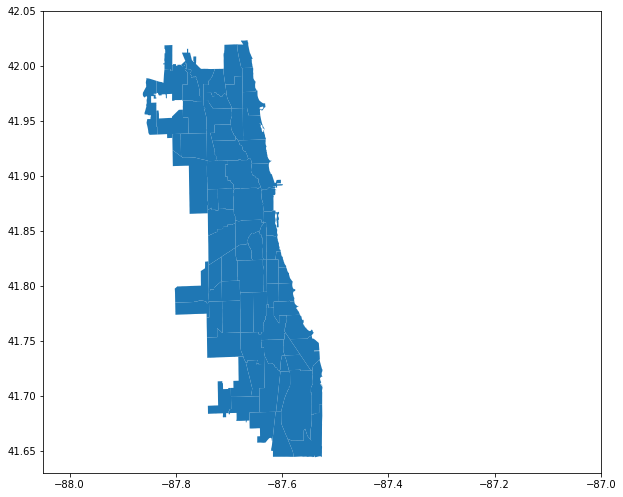

In [213]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8.5
for row in chicago_neighborhoods[['neighbourhood', 'coordinates2']].iterrows():
    hood = row[1][0]
    coord = row[1][1]
    draw_screen_poly([x[1] for x in coord], [x[0] for x in coord], 100)
plt.xlim(-88.05,-87.00)
plt.ylim(41.63,42.05)

In [209]:
len(chicago_neighborhoods['coordinates'].apply(lambda x: [coord for coord in x.split(',')])[0])

218

In [214]:
chicago_neighborhoods.columns

Index(['state', 'county', 'city', 'neighbourhood', 'regionid', 'total_potins',
       'coordinates', 'coordinates2'],
      dtype='object')

In [215]:
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [216]:
def point_inside_polygon(x,y,poly):
    """Return True if the point described by x, y is inside of the polygon
    described by the list of points [(x0, y0), (x1, y1), ... (xn, yn)] in
    ``poly``
    Code from http://www.ariel.com.au/a/python-point-int-poly.html which
    in turn was adapted from C code found at
    http://local.wasp.uwa.edu.au/~pbourke/geometry/insidepoly/
    """
    n = len(poly)
    inside =False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xinters = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

In [221]:
chicago_hoods = {x:y for x, y in zip(chicago_neighborhoods['regionid'], chicago_neighborhoods['coordinates2'])}
chicago_region_ids = {x:y for x, y in zip(chicago_neighborhoods['regionid'], chicago_neighborhoods['neighbourhood'])}

In [225]:
chicago_region_ids[[e for i,e in enumerate(chicago_hoods.keys()) if point_inside_polygon(-87.706665329, 41.800781216, chicago_hoods[e])][0]]

'Gage Park'

In [230]:
crime_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11706858,JC287006,05/31/2019 10:32:00 PM,024XX E 72ND ST,041A,BATTERY,AGGRAVATED - HANDGUN,RESTAURANT,False,False,...,7.0,43,04B,1193734.0,1857691.0,2019,11/10/2020 03:52:15 PM,41.764449,-87.565469,"(41.764448809, -87.565468967)"
1,11704699,JC284068,05/29/2019 09:55:00 PM,022XX W CERMAK RD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,True,False,...,25.0,31,05,1161792.0,1889364.0,2019,11/10/2020 03:52:15 PM,41.852086,-87.681664,"(41.852086224, -87.681664275)"
2,11608043,JC167110,02/26/2019 09:15:00 PM,001XX E 123RD ST,051A,ASSAULT,AGGRAVATED - HANDGUN,RESIDENCE,True,True,...,9.0,53,04A,1179294.0,1823431.0,2019,11/10/2020 03:52:15 PM,41.670776,-87.619436,"(41.670776461, -87.61943596)"
3,12148532,JD347169,06/01/2019 12:01:00 AM,055XX W 64TH ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,True,True,...,13.0,64,02,1140680.0,1861587.0,2019,11/09/2020 03:49:27 PM,41.776275,-87.759832,"(41.77627523, -87.759832397)"
4,11936873,JC565675,12/30/2019 05:57:00 PM,004XX W BARRY AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,44.0,6,04B,1172737.0,1920656.0,2019,11/09/2020 03:49:27 PM,41.937718,-87.640566,"(41.937718335, -87.64056599)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260402,24507,JC238631,04/26/2019 01:37:00 AM,109XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9.0,49,01A,1178194.0,1832459.0,2019,05/03/2019 04:14:46 PM,41.695576,-87.623190,"(41.695575575, -87.62318951)"
260403,24528,JC251611,05/06/2019 08:06:00 AM,000XX S ALBANY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,...,28.0,27,01A,1155916.0,1899636.0,2019,05/13/2019 04:13:25 PM,41.880394,-87.702954,"(41.880394026, -87.702954046)"
260404,24536,JC259301,05/11/2019 07:27:00 PM,058XX W DIVISION ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,29.0,25,01A,1136993.0,1907395.0,2019,05/18/2019 04:03:45 PM,41.902046,-87.772252,"(41.902046108, -87.772251983)"
260405,24541,JC262922,05/14/2019 04:28:00 PM,031XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,...,28.0,27,01A,1155639.0,1899371.0,2019,05/21/2019 04:08:13 PM,41.879672,-87.703978,"(41.879672418, -87.703978301)"


In [233]:
def addNeighToDataset(data):
    longitude = data['Longitude'].values
    latitude = data['Latitude'].values
    region = []
    for locationx, locationy in zip(longitude,latitude):
        place = [e for i,e in enumerate(chicago_hoods.keys()) if point_inside_polygon(float(locationx), float(locationy), chicago_hoods[e])]
        if len(place) == 1:
            region.append(place[0])
        else:
            region.append('None')

    #data['regionid'] = region
    return region


In [ ]:
addNeighToDataset(crime_data)